HR analytics dataset describes various features related to HR attrition.Based on the given data, We are trying to build a model for predicting attrition in HR 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\a\Documents\PROJECTS----\DT - Project\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

There are 1470 rows and 35 columns

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
pd.set_option('display.max_rows',None)

In [7]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No null values present in the dataset

In [9]:
#To see unique values in target column
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

The target column is abinary classification problem

In [10]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

0 represents no attrition and 1 represents attrition.There are 1233 values for no attrition and 237 values for attrition

<AxesSubplot:xlabel='Attrition', ylabel='count'>

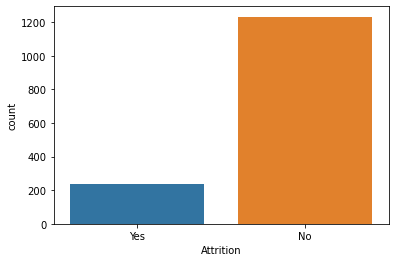

In [11]:
sb.countplot(df['Attrition'])

This is an example of imbalanced dataset which will be treated later.

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()

In [14]:
df['Attrition']=le.fit_transform(df['Attrition'])

In [15]:
df['Attrition'].head()

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: int32

The Target column was transformed into numerical values with label encoder

# Analysis of all categorical column

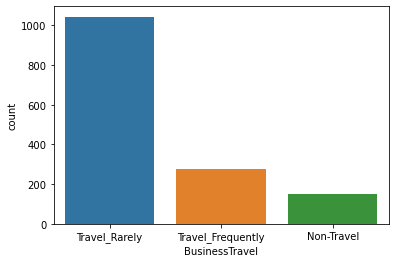

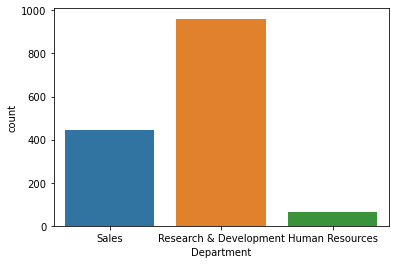

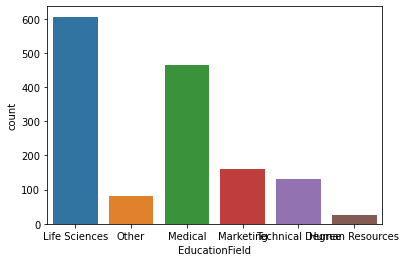

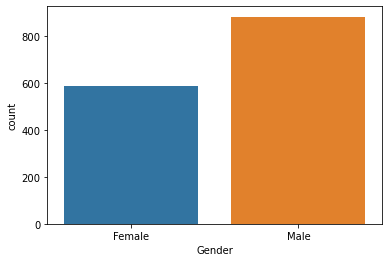

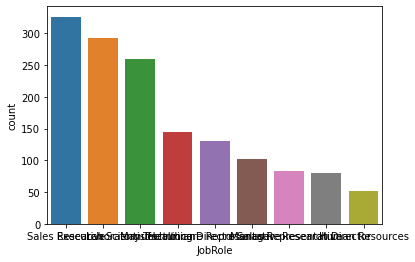

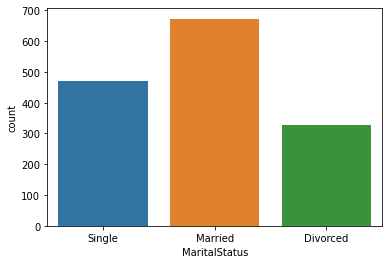

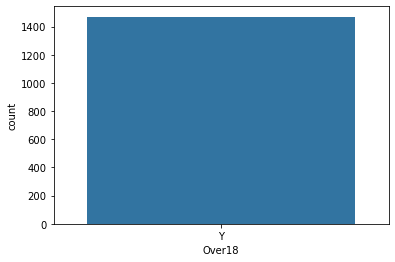

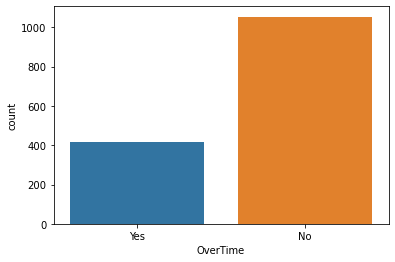

In [16]:
columns=['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
for i in df[columns]:
    plt.figure()
    sb.countplot(df[i])

Distribution of data in categorical columns were analysed by countplot.The over18 has a single value and therefore will be dropped later.Also

# Graphical analysis of numerical columns

In [17]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
len(numerical_features)

27

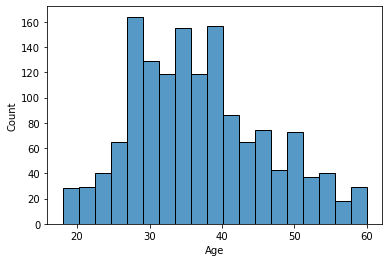

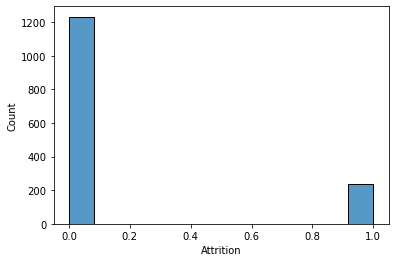

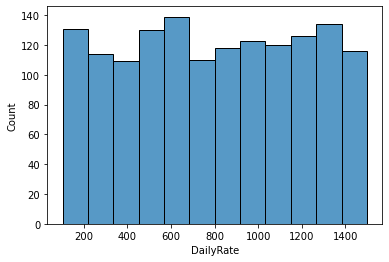

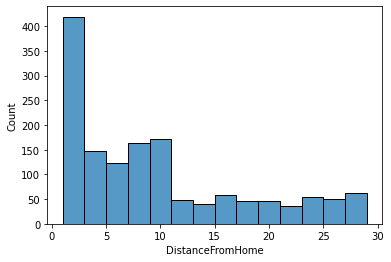

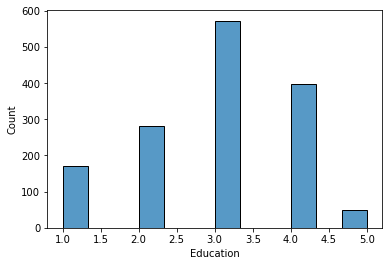

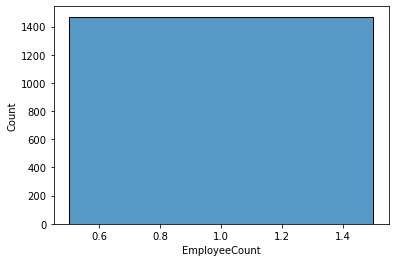

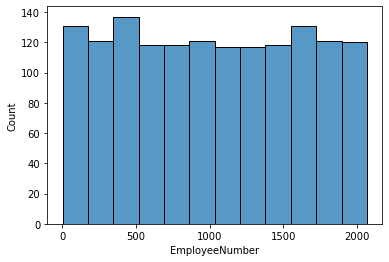

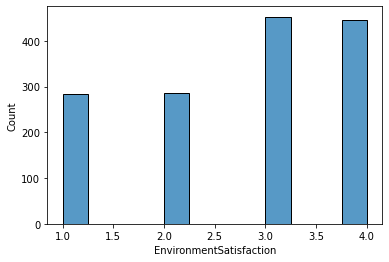

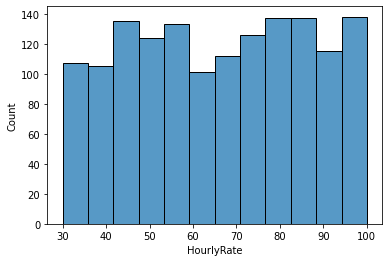

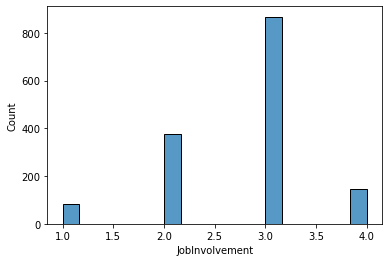

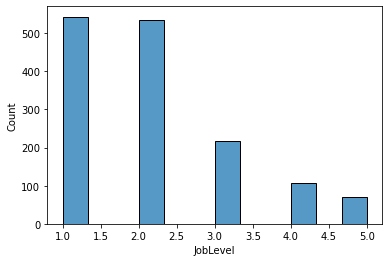

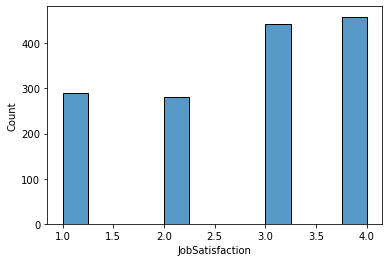

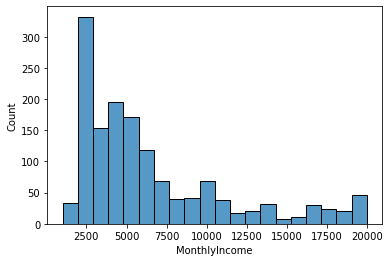

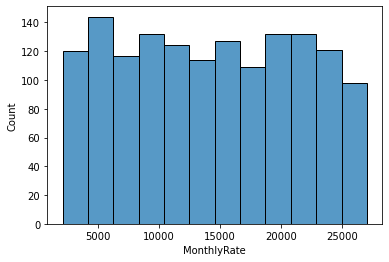

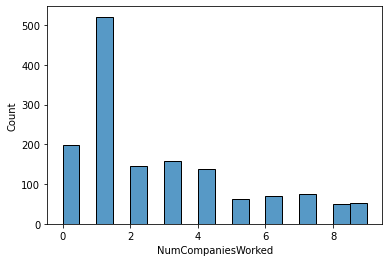

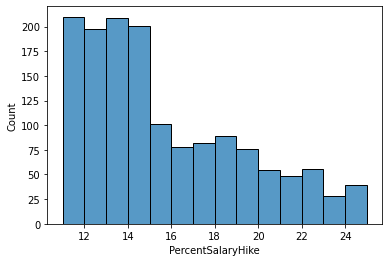

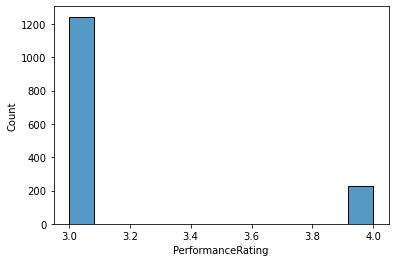

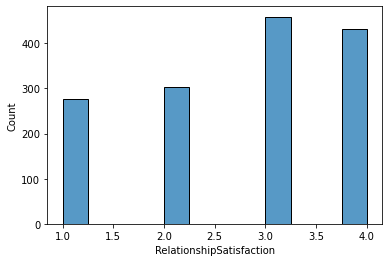

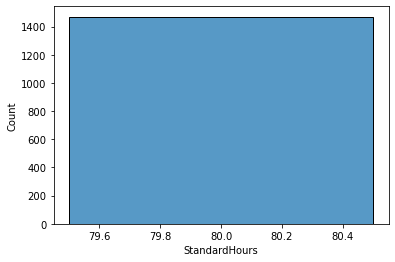

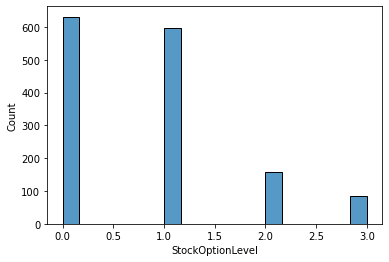

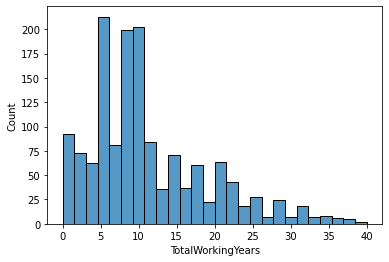

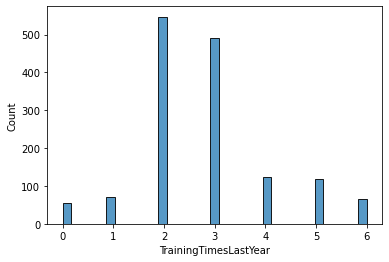

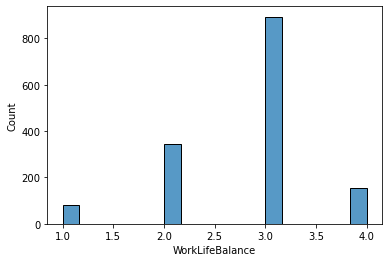

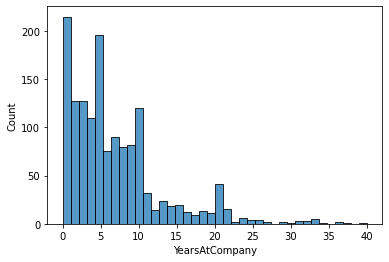

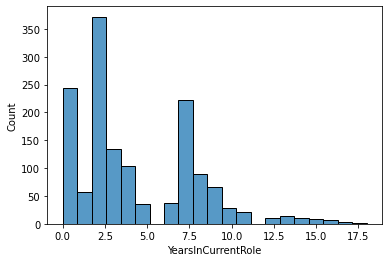

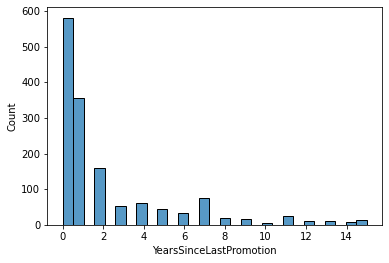

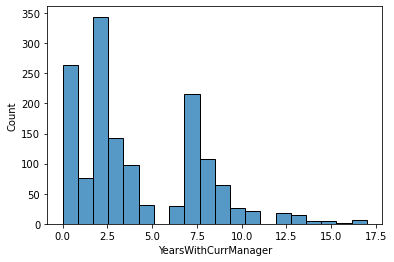

In [18]:
for i in df[numerical_features]:
    plt.figure()
    sb.histplot(df[i])

histogram was used to see the distribution of each feature.Employee count and Standard hours were found to be same for all employees.Also Since employee number is also not required for model building,these three columnswill be dropped.

# Transform all the categorical variables into numerical variable

In [19]:
from sklearn.preprocessing import OrdinalEncoder

In [20]:
oe=OrdinalEncoder()

In [21]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

In [22]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,7,...,4,80,1,6,3,3,2,2,2,2


In [23]:
df.dtypes

Age                           int64
Attrition                     int32
BusinessTravel              float64
DailyRate                     int64
Department                  float64
DistanceFromHome              int64
Education                     int64
EducationField              float64
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                      float64
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                     float64
JobSatisfaction               int64
MaritalStatus               float64
MonthlyIncome                 int64
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                      float64
OverTime                    float64
PercentSalaryHike             int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StandardHours                 int64
StockOptionLevel            

# Dropping unnecessary columns

In [24]:
#Dropping Over18
df['Over18'].unique()

array([0.])

In [25]:
df.drop('Over18',axis=1,inplace=True)

In [26]:
df.shape

(1470, 34)

In [27]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,7,...,4,80,1,6,3,3,2,2,2,2


In [28]:
df.drop(['EmployeeCount','StandardHours','EmployeeNumber'],axis=1,inplace=True)

In [29]:
df.shape

(1470, 31)

# Multivariate analysis

In [30]:
#correlation
cor=df.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

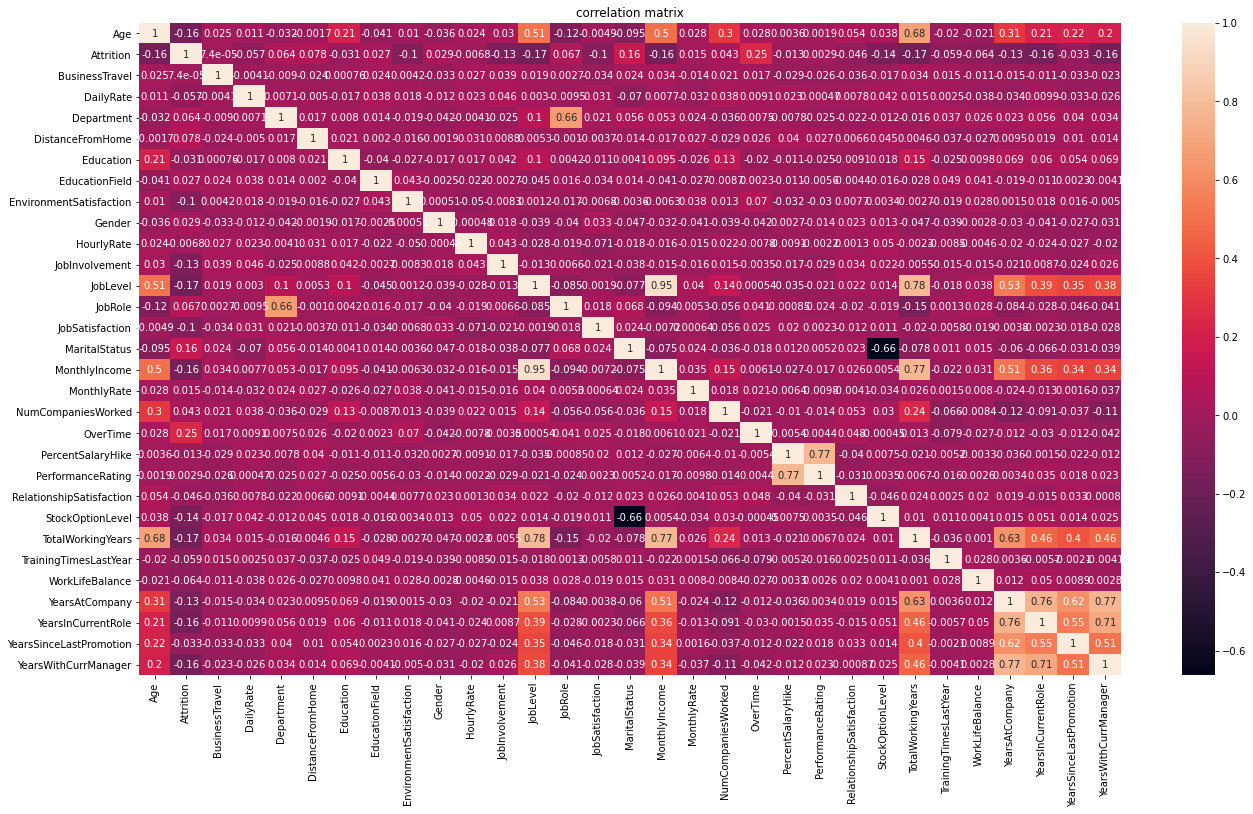

In [31]:
plt.figure(figsize=[22,12])
sb.heatmap(cor,annot=True)
plt.title('correlation matrix')
plt.show

Job level,monthly income  is positively correlated with total working years.

In [32]:
cor['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
MaritalStatus               0.162070
DistanceFromHome            0.077924
JobRole                     0.067151
Department                  0.063991
NumCompaniesWorked          0.043494
Gender                      0.029453
EducationField              0.026846
MonthlyRate                 0.015170
PerformanceRating           0.002889
BusinessTravel              0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
M

Attrition has been found to be associated with overtime.

In [33]:
df.shape

(1470, 31)

In [34]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


# Boxplot of all the features

<AxesSubplot:>

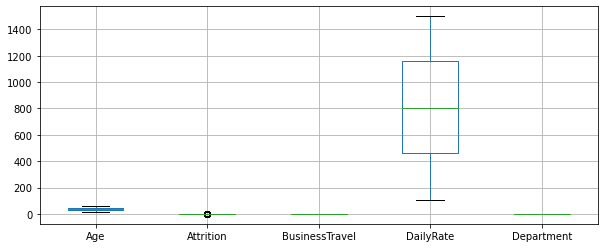

In [35]:
df.iloc[:,0:5].boxplot(figsize=[10,4])

<AxesSubplot:>

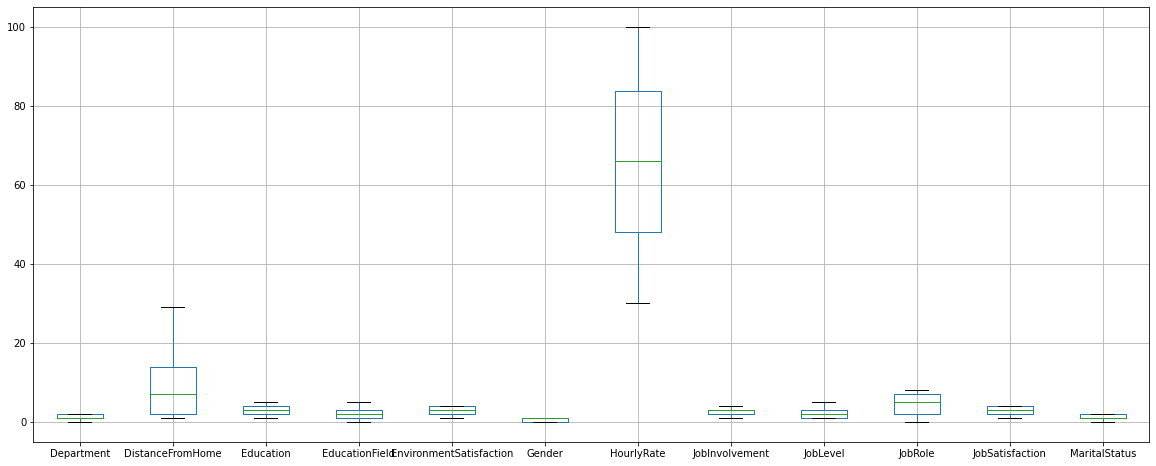

In [36]:
df.iloc[:,4:16].boxplot(figsize=[20,8])

<AxesSubplot:>

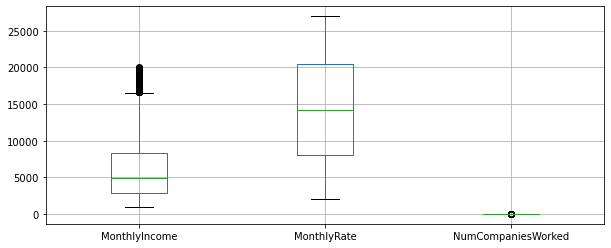

In [37]:
df.iloc[:,16:19].boxplot(figsize=[10,4])

<AxesSubplot:>

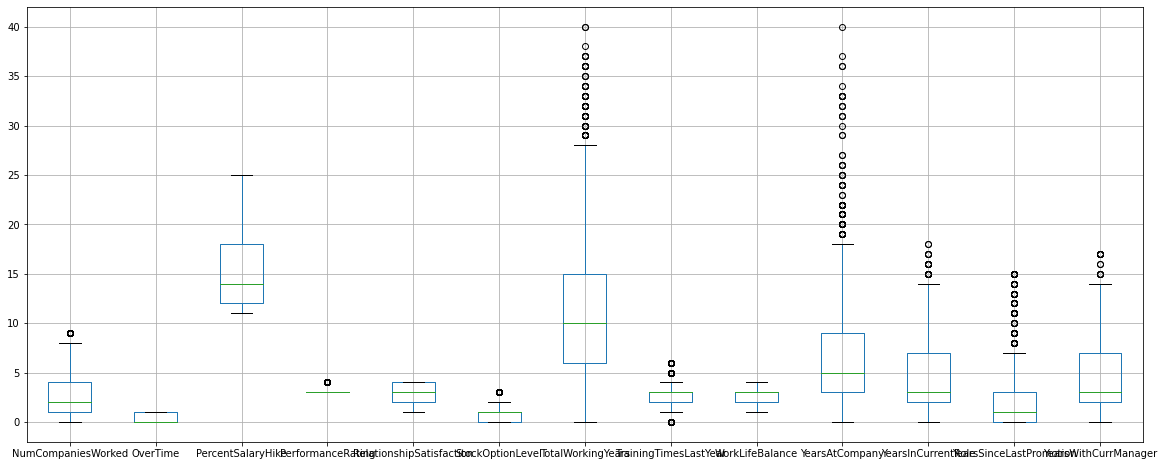

In [38]:
df.iloc[:,18:].boxplot(figsize=[20,8])

# outlier removal

In [39]:
from scipy.stats import zscore

In [40]:
z=np.abs(zscore(df))

In [41]:
new_df=df[(z<3).all(axis=1)]

In [42]:
new_df.shape

(1387, 31)

In [43]:
df.shape

(1470, 31)

In [44]:
df=new_df

In [45]:
df.shape

(1387, 31)

# splitting of data

In [46]:
y=df["Attrition"]
x=df.drop("Attrition",axis=1)

In [47]:
x.shape

(1387, 30)

In [48]:
x.head(2)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2.0,1102,2.0,1,2,1.0,2,0.0,94,...,3,1,0,8,0,1,6,4,0,5
1,49,1.0,279,1.0,8,1,1.0,3,1.0,61,...,4,4,1,10,3,3,10,7,1,7


In [49]:
y.shape

(1387,)

In [50]:
x.skew()

Age                         0.472280
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
Y

# Treating skewness

In [51]:
from sklearn.preprocessing import power_transform

In [52]:
new_df1=power_transform(x)

In [53]:
new_df1=pd.DataFrame(new_df1,columns=x.columns)

In [54]:
new_df1.skew()

Age                        -0.004079
BusinessTravel             -0.960583
DailyRate                  -0.199742
Department                  0.015095
DistanceFromHome           -0.008149
Education                  -0.103747
EducationField             -0.008642
EnvironmentSatisfaction    -0.205472
Gender                     -0.417296
HourlyRate                 -0.105678
JobInvolvement             -0.018801
JobLevel                    0.110769
JobRole                    -0.337641
JobSatisfaction            -0.217730
MaritalStatus              -0.158253
MonthlyIncome               0.027700
MonthlyRate                -0.176560
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.191406
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.011133
YearsAtCompany             -0.025230
Y

In [55]:
x=new_df1

# standardisation/scaling

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scale=MinMaxScaler()
df_new=scale.fit_transform(x)

In [58]:
df_new=pd.DataFrame(df_new,columns=x.columns)

In [59]:
x=df_new

# Importing libraries for model building

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [61]:
from sklearn.linear_model import LogisticRegression
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predLR=LR.predict(x_test)
    acc=accuracy_score(y_test,predLR)
    if acc>maxaccu:
        maxaccu=acc
        maxrs=i
print(maxaccu)
print(maxrs)

0.8992805755395683
166


In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=166)

# Using RandomOver Sampler for upsampling

In [85]:
#pip install imblearn

In [86]:
from imblearn.over_sampling import RandomOverSampler

In [87]:
ros=RandomOverSampler(1)

In [88]:
x_train_res,y_train_res=ros.fit_resample(x_train,y_train)

In [89]:
from collections import Counter

In [90]:
print(sorted(Counter(y_train).items()))

[(0, 800), (1, 170)]


In [91]:
print(sorted(Counter(y_train_res).items()))

[(0, 800), (1, 800)]


# Model Building

In [92]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier()]
for m in model:
    m.fit(x_train_res,y_train_res)
    m.score(x_train_res,y_train_res)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

0.7697841726618705
[[272  86]
 [ 10  49]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85       358
           1       0.36      0.83      0.51        59

    accuracy                           0.77       417
   macro avg       0.66      0.80      0.68       417
weighted avg       0.88      0.77      0.80       417



0.762589928057554
[[293  65]
 [ 34  25]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       358
           1       0.28      0.42      0.34        59

    accuracy                           0.76       417
   macro avg       0.59      0.62      0.60       417
weighted avg       0.81      0.76      0.78       417



0.8369304556354916
[[307  51]
 [ 17  42]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90       358
           1       0.45      0.71      0.55        59

    accuracy                           0.84       417

# Cross validation

In [71]:
from sklearn.model_selection import cross_val_score

In [93]:
lg=LogisticRegression()
print (cross_val_score(lg,x,y,cv=5).mean())

0.8702256966989586


In [94]:
dtc=DecisionTreeClassifier()
print (cross_val_score(dtc,x,y,cv=5).mean())

0.7887385398540372


In [95]:
svc=SVC()
print (cross_val_score(svc,x,y,cv=5).mean())

0.8659117471365867


In [96]:
rfc=RandomForestClassifier()
print (cross_val_score(rfc,x,y,cv=5).mean())

0.8558034438874893


# Hyperparameter tuning

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
parameter={'kernel':['linear','poly','rbf'],'C':[0.1,0.5,1],'random_state':[166]}
svc=SVC()
gd=GridSearchCV(svc,parameter,cv=5)

In [101]:
gd.fit(x_train_res,y_train_res)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'random_state': [166]})

In [102]:
gd.best_params_

{'C': 1, 'kernel': 'poly', 'random_state': 166}

# Best model

In [103]:
Final_model=SVC(kernel='poly',C=1.0,random_state=166)
Final_model.fit(x_train_res,y_train_res)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8057553956834532
[[298  60]
 [ 21  38]]
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       358
           1       0.39      0.64      0.48        59

    accuracy                           0.81       417
   macro avg       0.66      0.74      0.68       417
weighted avg       0.86      0.81      0.82       417



# Saving the best model

In [107]:
import joblib

In [108]:
filename='finalhrmodel.pkl'

In [109]:
joblib.dump(Final_model,'finalhrmodel.pkl')

['finalhrmodel.pkl']